In [1]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'cmc'
test_on_all_folds = True
test_all_ds = False

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 6},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 200}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 2},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 16,
  'gamma': 0.9,
  'epochs': 100}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 150}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.00001,
 'batch_size': 16,
 'gamma': 0.90,
 'epochs': 70}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0003,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': {'un

In [8]:
def instantiate_classifiers():
    classifiers = {
#             "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
#             "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
        } 
    return classifiers

cmc


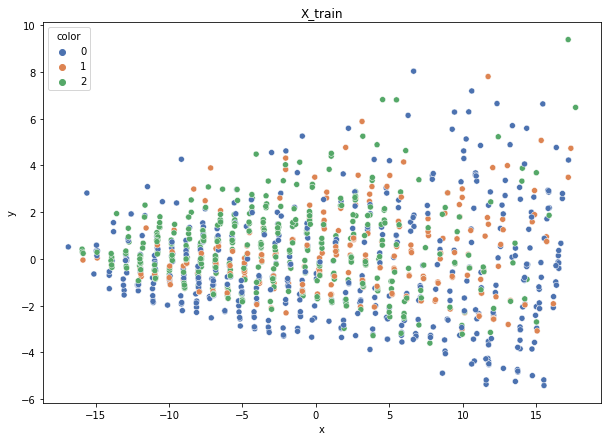

Class cardinalities: Counter({0: 503, 2: 409, 1: 266})
Weights: {0: 0.2426709552796112, 1: 0.45888530265279864, 2: 0.29844374206759033}


100%|██████████| 295/295 [00:00<00:00, 3441.50it/s]


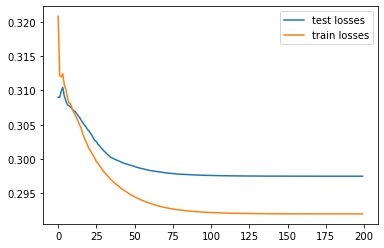

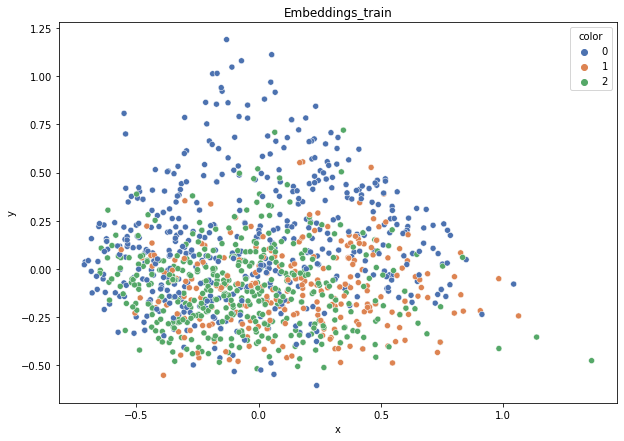

DT-f1-new-features: 0.448
DT-f1-old+new-features: 0.436
DT-f1-old-features: 0.469
DT-gmean-new-features: 0.452
DT-gmean-old+new-features: 0.441
DT-gmean-old-features: 0.467
KNN-f1-new-features: 0.493
KNN-f1-old+new-features: 0.473
KNN-f1-old-features: 0.436
KNN-gmean-new-features: 0.488
KNN-gmean-old+new-features: 0.47
KNN-gmean-old-features: 0.428
RF24-f1-new-features: 0.516
RF24-f1-old+new-features: 0.516
RF24-f1-old-features: 0.519
RF24-gmean-new-features: 0.505
RF24-gmean-old+new-features: 0.509
RF24-gmean-old-features: 0.523


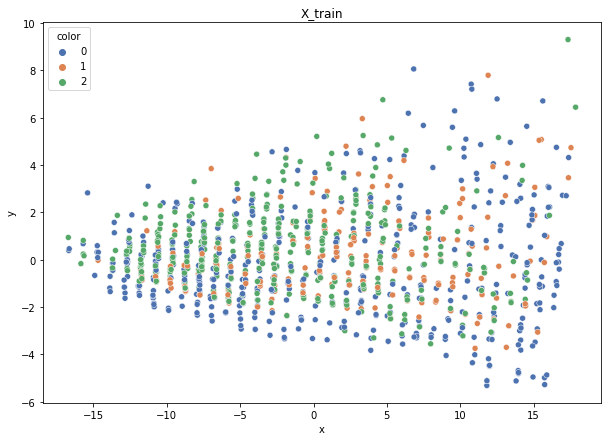

Class cardinalities: Counter({0: 503, 2: 409, 1: 266})
Weights: {0: 0.2426709552796112, 1: 0.45888530265279864, 2: 0.29844374206759033}


100%|██████████| 295/295 [00:00<00:00, 3462.87it/s]


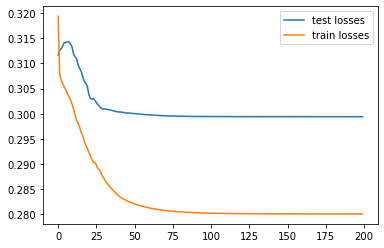

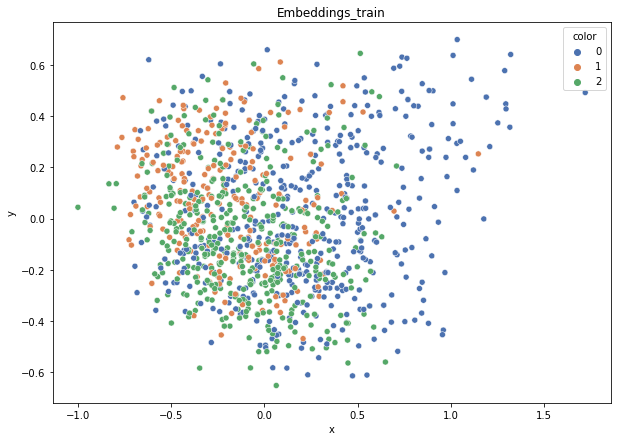

DT-f1-new-features: 0.436
DT-f1-old+new-features: 0.458
DT-f1-old-features: 0.491
DT-gmean-new-features: 0.44
DT-gmean-old+new-features: 0.456
DT-gmean-old-features: 0.503
KNN-f1-new-features: 0.493
KNN-f1-old+new-features: 0.449
KNN-f1-old-features: 0.485
KNN-gmean-new-features: 0.487
KNN-gmean-old+new-features: 0.444
KNN-gmean-old-features: 0.484
RF24-f1-new-features: 0.498
RF24-f1-old+new-features: 0.522
RF24-f1-old-features: 0.515
RF24-gmean-new-features: 0.488
RF24-gmean-old+new-features: 0.521
RF24-gmean-old-features: 0.519


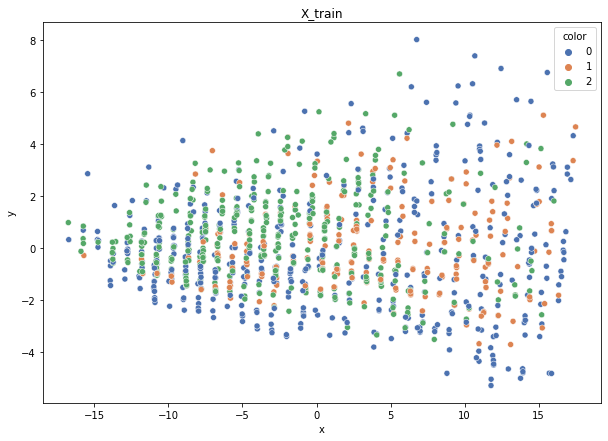

Class cardinalities: Counter({0: 503, 2: 408, 1: 267})
Weights: {0: 0.2429107547813522, 1: 0.45761838822104933, 2: 0.29947085699759846}


100%|██████████| 295/295 [00:00<00:00, 3024.61it/s]


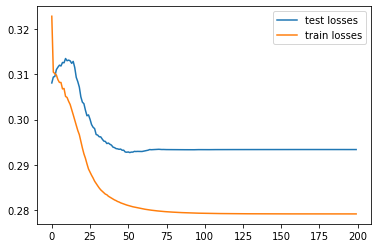

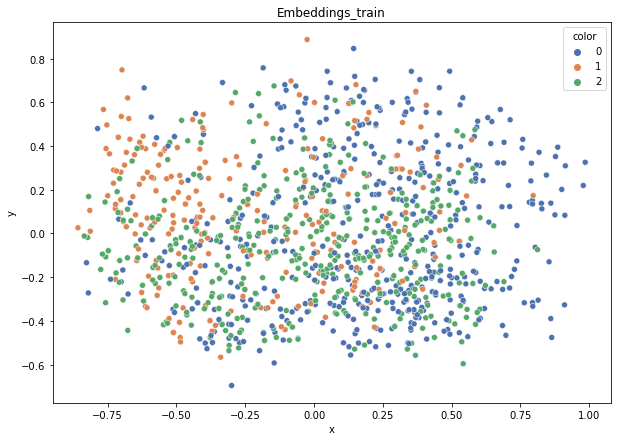

DT-f1-new-features: 0.415
DT-f1-old+new-features: 0.446
DT-f1-old-features: 0.462
DT-gmean-new-features: 0.421
DT-gmean-old+new-features: 0.44
DT-gmean-old-features: 0.46
KNN-f1-new-features: 0.429
KNN-f1-old+new-features: 0.418
KNN-f1-old-features: 0.464
KNN-gmean-new-features: 0.424
KNN-gmean-old+new-features: 0.412
KNN-gmean-old-features: 0.461
RF24-f1-new-features: 0.448
RF24-f1-old+new-features: 0.525
RF24-f1-old-features: 0.52
RF24-gmean-new-features: 0.436
RF24-gmean-old+new-features: 0.51
RF24-gmean-old-features: 0.513


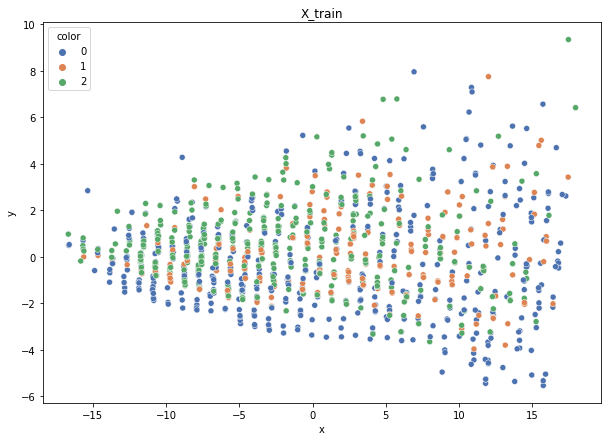

Class cardinalities: Counter({0: 503, 2: 409, 1: 267})
Weights: {0: 0.24308874498865835, 1: 0.4579537031059744, 2: 0.29895755190536716}


100%|██████████| 294/294 [00:00<00:00, 3286.35it/s]


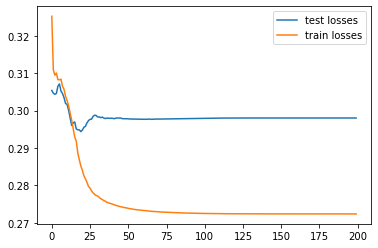

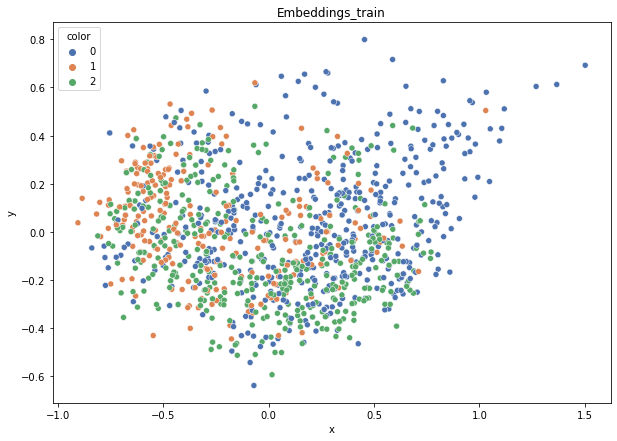

DT-f1-new-features: 0.394
DT-f1-old+new-features: 0.471
DT-f1-old-features: 0.444
DT-gmean-new-features: 0.392
DT-gmean-old+new-features: 0.47
DT-gmean-old-features: 0.442
KNN-f1-new-features: 0.445
KNN-f1-old+new-features: 0.413
KNN-f1-old-features: 0.415
KNN-gmean-new-features: 0.44
KNN-gmean-old+new-features: 0.397
KNN-gmean-old-features: 0.397
RF24-f1-new-features: 0.469
RF24-f1-old+new-features: 0.501
RF24-f1-old-features: 0.506
RF24-gmean-new-features: 0.455
RF24-gmean-old+new-features: 0.484
RF24-gmean-old-features: 0.494


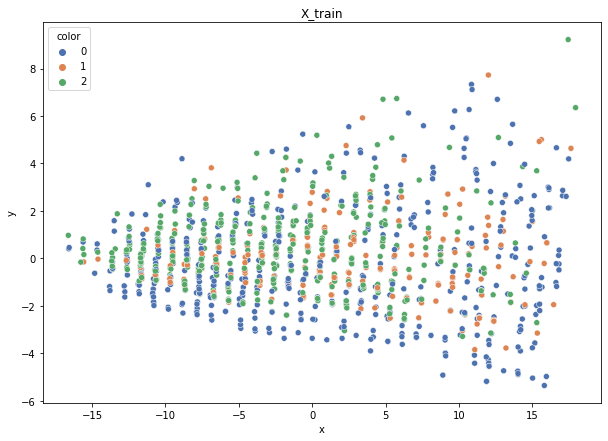

Class cardinalities: Counter({0: 504, 2: 409, 1: 266})
Weights: {0: 0.24230613326681422, 1: 0.4591063577687006, 2: 0.29858750896448505}


100%|██████████| 294/294 [00:00<00:00, 3376.90it/s]


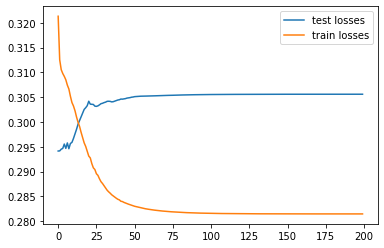

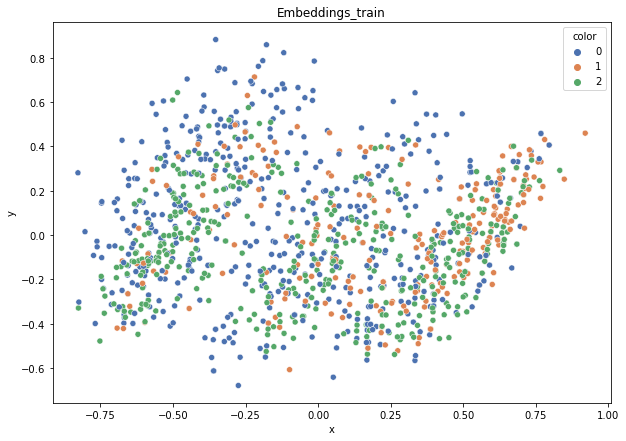

DT-f1-new-features: 0.437
DT-f1-old+new-features: 0.472
DT-f1-old-features: 0.473
DT-gmean-new-features: 0.437
DT-gmean-old+new-features: 0.466
DT-gmean-old-features: 0.483
KNN-f1-new-features: 0.395
KNN-f1-old+new-features: 0.441
KNN-f1-old-features: 0.453
KNN-gmean-new-features: 0.387
KNN-gmean-old+new-features: 0.425
KNN-gmean-old-features: 0.444
RF24-f1-new-features: 0.448
RF24-f1-old+new-features: 0.49
RF24-f1-old-features: 0.522
RF24-gmean-new-features: 0.436
RF24-gmean-old+new-features: 0.468
RF24-gmean-old-features: 0.525


In [9]:
result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [10]:
results_df = pd.DataFrame.from_dict(result_dict)

In [11]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,KNN-f1-old+new-features,KNN-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features
0,cmc,0.5164,0.514937,0.467943,0.470938,0.450639,0.442843,0.510678,0.498376,0.456499,0.454719,0.43905,0.429597,0.476054,0.464069,0.426051,0.428344,0.450746,0.445132


In [12]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,cmc,0.516400,0.510678,0.476054


In [13]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,cmc,0.514937,0.498376,0.464069


In [14]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,cmc,0.467943,0.456499,0.426051


In [15]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,cmc,0.470938,0.454719,0.428344


In [16]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,cmc,0.450639,0.439050,0.450746


In [17]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,cmc,0.442843,0.429597,0.445132
